In [2]:
import numpy as np
import pandas as pd
from easygui import *
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math

In [3]:
#df is your players' data, just change the path to your data file's path.
df = pd.read_html(r"/Users/Zhaoyichun/Downloads/Attribution.html",skiprows=0,)[0]
pd.set_option('display.max_columns',33)
pd.set_option('display.max_rows',5)
pd.set_option('precision', 0)
df.head()

,Name,Age,Best Pos,Personality,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,TRO,Ref,Pun,Pos,...,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc,Preferred Foot,Dirt,Cons,Height,Vers,Best Pos.1,Best Role
0,Benjamin Å eÅ¡ko,21,ST (C),Balanced,13,14,2,12,12,8,15,14,3,2,4,11,...,3,3,12,16,14,14,13,2,17,Right,8,12,194 cm,9,ST (C),Advanced Forward
1,Karim Adeyemi,22,AM (R),Driven,16,14,1,15,13,6,13,15,1,3,2,8,...,2,3,11,10,14,17,8,1,17,Left,5,13,179 cm,6,"M/AM (RL), ST (RL)",Inverted Winger
2,Lorenzo Lucca,23,ST (C),Driven,15,12,2,14,13,8,16,15,1,1,3,11,...,1,3,13,14,14,13,11,2,13,Right,8,14,201 cm,8,ST (C),Target Forward
3,Dominik Szoboszlai,23,AM (L),Balanced,14,14,2,15,14,10,13,13,1,1,1,9,...,1,1,12,13,13,13,8,2,16,Right,5,14,186 cm,12,"M/AM (RL), ST (RL)",Inverted Winger
4,Cole Palmer,22,AM (R),Balanced,13,14,2,15,12,8,11,14,3,2,2,9,...,4,2,8,14,13,16,12,1,16,Left,5,10,187 cm,10,"M/AM (RL), ST (RL)",Inverted Winger


In [4]:
df['Physical'] = (df['Bal'] + df['Nat'] + df['Sta']+ df['Str']) / 4
df['Defending'] = (df['Tck'] + df['Mar'] + df['Pos']) / 3
df['Mental'] = (df['Cmp'] + df['Cnt'] + df['Ant'] + df['Dec']) / 4
df['Speed'] = (df['Acc'] + df['Pac'] + df['Agi']) / 3
df['Technical'] = (df['Fir'] + df['Tec'] + df['Pas']) / 3
df['Aerial'] = (df['Hea'] + df['Jum'] + df['Str']) / 3
df['Pass'] = (df['Cro'] + df['Pas']  + df['Vis'] + df['Dec']) / 4
df['Shotting'] = (df['Fin'] + df['Lon'] + df['Cmp'] + df['Pen']) / 4
df['Model'] = (df['Det'] + df['Wor'] + df['Cons'] + df['Tea']) / 4

/var/folders/js/l945ghm905b7hw9ky4qvhp0r0000gn/T/ipykernel_4823/1217672625.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  for name, features in df.groupby(df['Name'])[player_features].mean().iterrows():


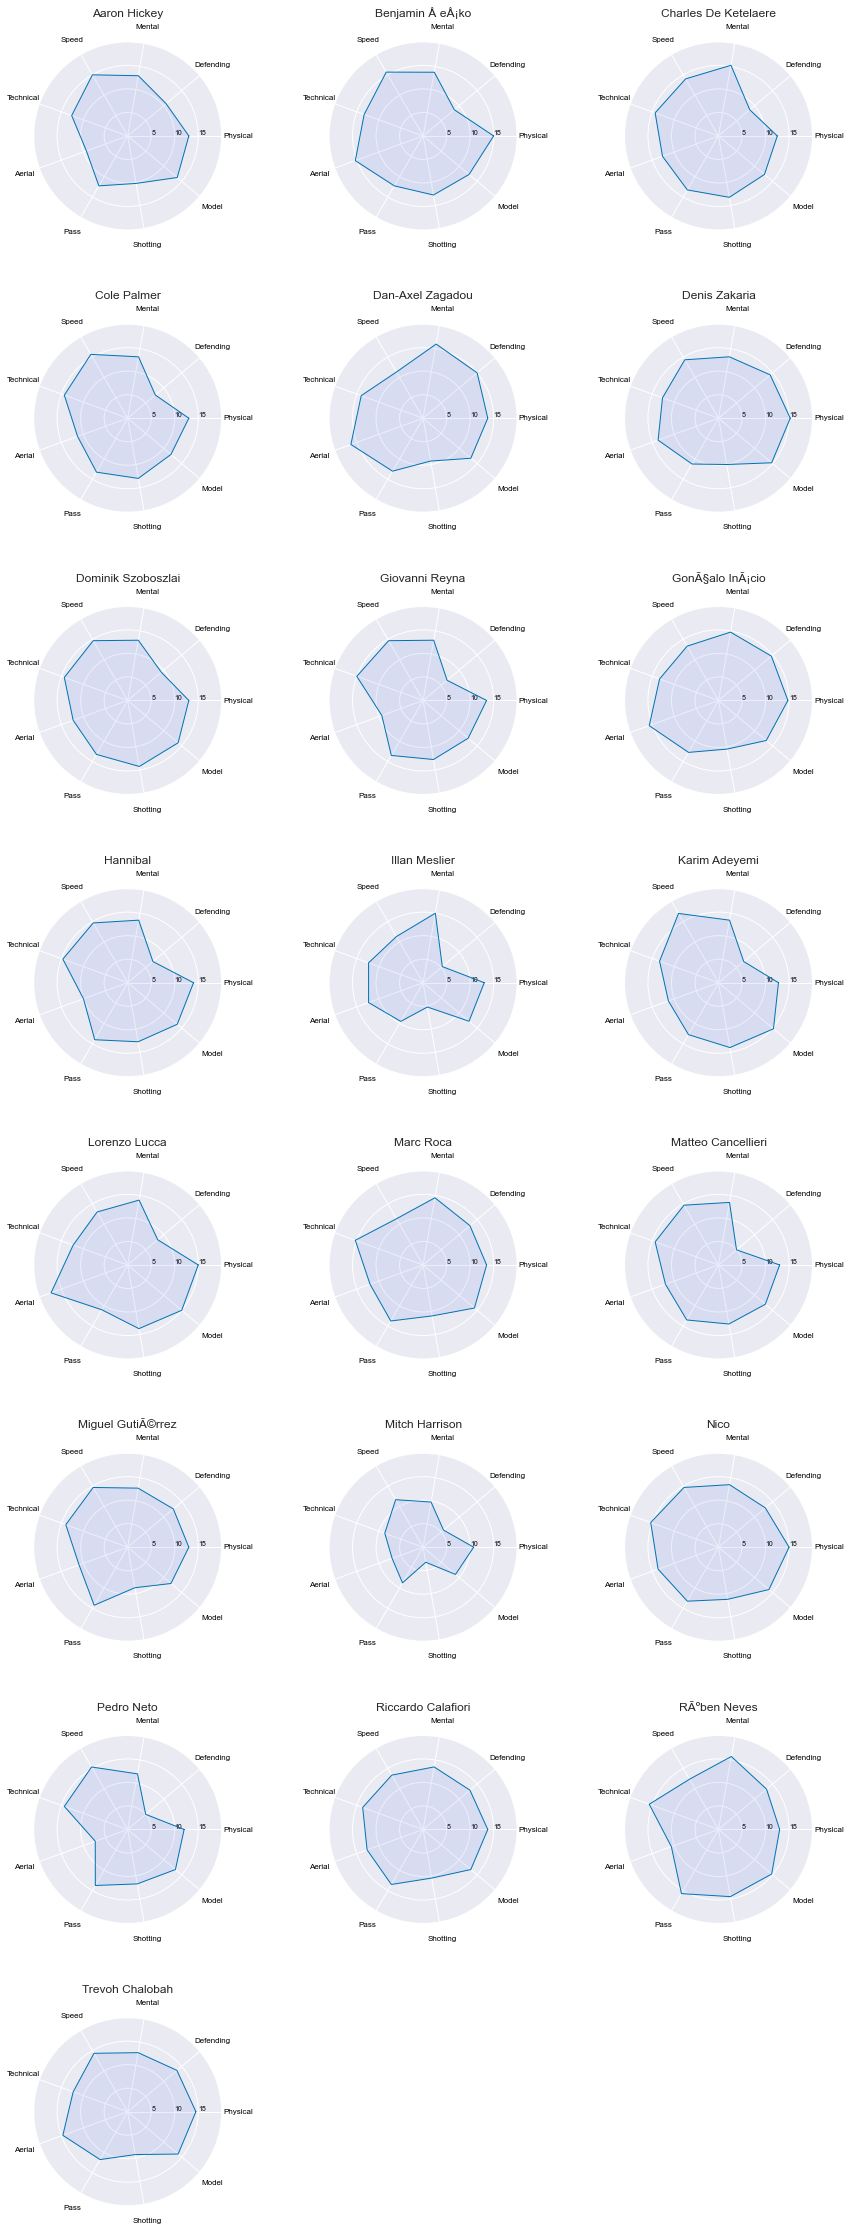

In [9]:
#Visualising players' attributes in 9 categories

player_features =('Physical' , 'Defending', 'Mental', 'Speed', 'Technical', 'Aerial', 'Pass', 'Shotting' , 'Model')
plt.figure(figsize=(15,45))
idx = 1
for name, features in df.groupby(df['Name'])[player_features].mean().iterrows():
    top_features = dict(features)
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([5,10,15], ["5","10","15"], color="black", size=7)
    plt.ylim(0,20)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'royalblue', alpha=0.1)
    plt.title(name, size=12, y=1.1)

    idx += 1

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


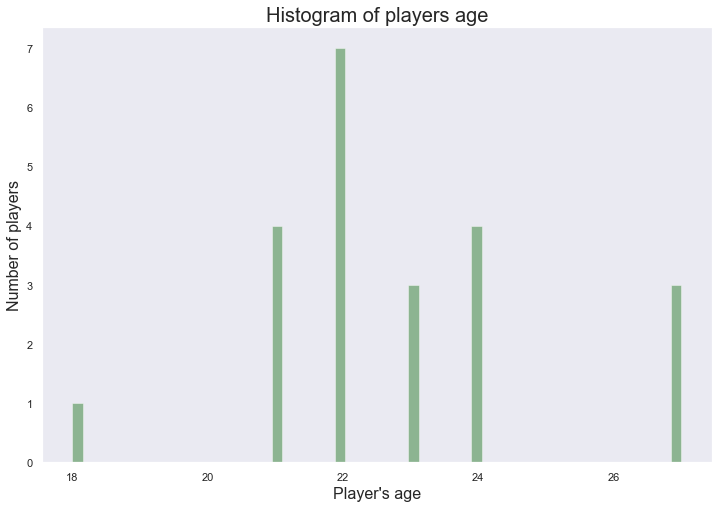

In [10]:
#players' age
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = df['Age']
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color='darkgreen')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players age', fontsize=20)
plt.show()

In [11]:
df['getCard'] = df['Agg'] + df['Dirt']

fig = px.scatter(df, x="Agg", y="Dirt", text="Name", log_x=False, size_max=20, color="getCard" , size='Tck')
#fig.update_yaxes(autorange="reversed")
fig.update_traces(textposition='top center')
fig.update_layout(height=500)
fig.update_xaxes(title_text='Dirty')
fig.update_yaxes(title_text='Aggresion')
for template in ["seaborn"]:
    fig.update_layout(template=template, title="Yellow/Red Card Analysis")
fig.show()

In [12]:
#All players Personalities
pd.set_option('display.max_rows', 500)
print(df[['Name','Personality']].sort_values(by=['Personality'], ascending=True))


                    Name          Personality
5         Giovanni Reyna            Ambitious
0       Benjamin Å eÅ¡ko             Balanced
16      Dan-Axel Zagadou             Balanced
8   Charles De Ketelaere             Balanced
21         Illan Meslier             Balanced
3     Dominik Szoboszlai             Balanced
4            Cole Palmer             Balanced
1          Karim Adeyemi               Driven
2          Lorenzo Lucca               Driven
20     Miguel GutiÃ©rrez    Fairly Determined
14      GonÃ§alo InÃ¡cio  Fairly Professional
13         Denis Zakaria  Fairly Professional
10             Marc Roca  Fairly Professional
18       Trevoh Chalobah      Fairly Sporting
7             Pedro Neto        Model Citizen
9               Hannibal        Perfectionist
11          RÃºben Neves         Professional
12          Aaron Hickey             Resolute
6     Matteo Cancellieri             Resolute
17    Riccardo Calafiori             Resolute
19        Mitch Harrison          

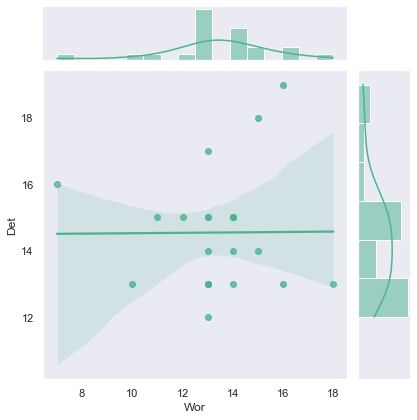

In [13]:
#Determination and Workrate of the team
sns.jointplot(x=df['Wor'], y=df['Det'], kind="reg", color="#4CB391");

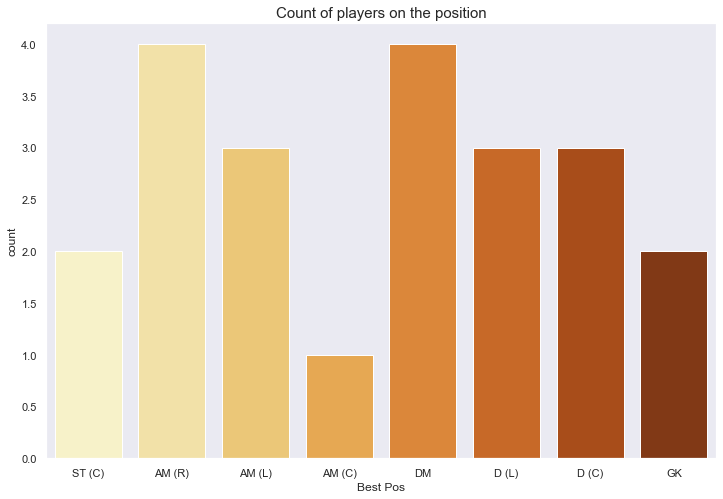

In [14]:
#Analysis all players best position
plt.figure(figsize=(12,8))
ax = sns.countplot(x = 'Best Pos', data = df, palette = 'YlOrBr');
ax.set_title(label='Count of players on the position', fontsize=15);


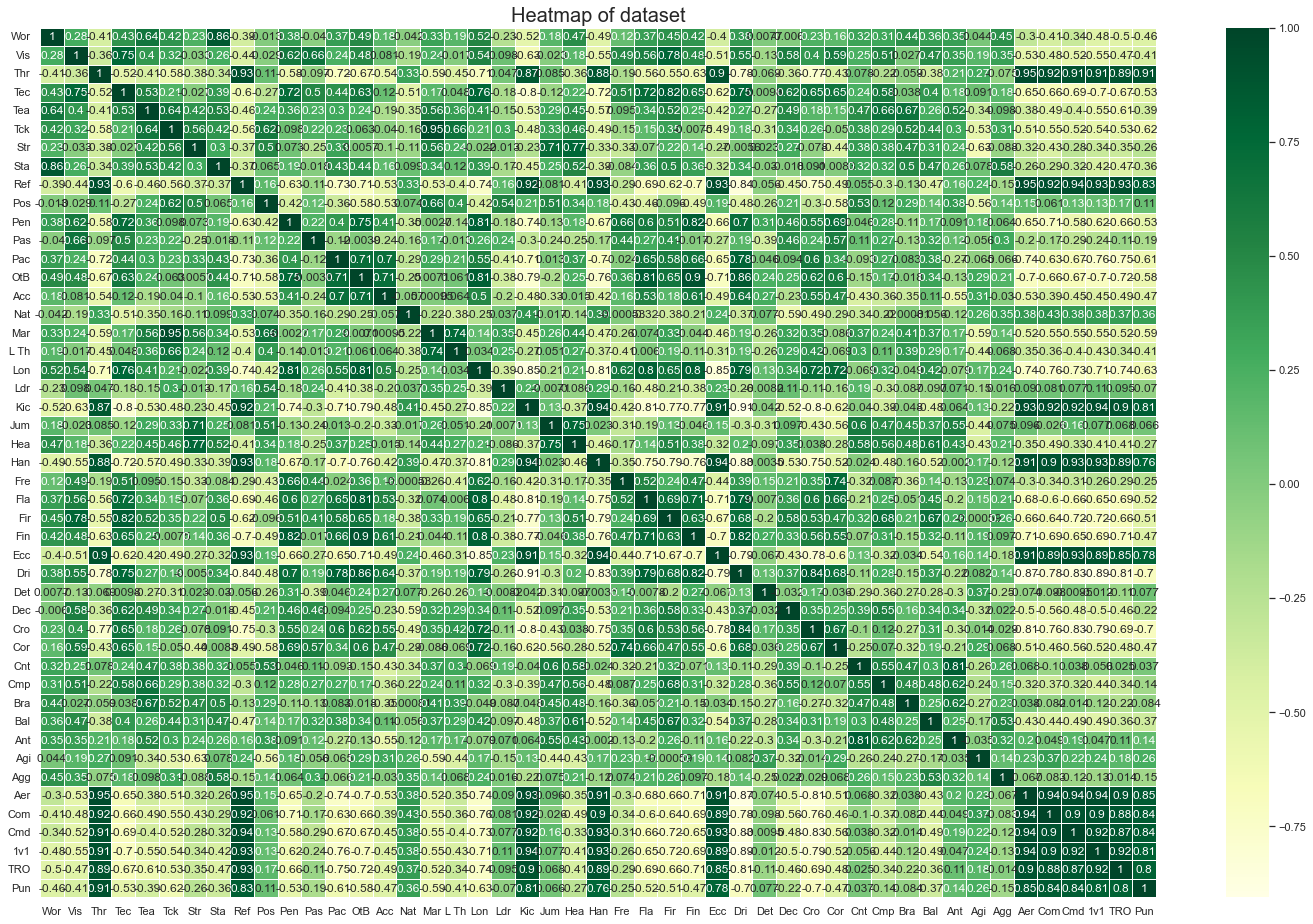

In [15]:
#Trend of each attributes relate to others
plt.rcParams['figure.figsize']=(25,16)
map=sns.heatmap(df[['Wor', 'Vis', 'Thr', 'Tec', 'Tea', 'Tck', 'Str', 'Sta', "Ref", 'Pos', 
                'Pen', 'Pas', 'Pac', 'OtB', 'Acc', 'Nat', 'Mar', 'L Th', 'Lon', 'Ldr', 'Kic', 'Jum', 'Hea',
                'Han', 'Fre', 'Fla', 'Fir', 'Fin', 'Ecc', 'Dri', 'Det', 'Dec', 'Cro', 'Cor', 'Cnt',
                'Cmp', 'Bra', 'Bal', 'Ant', 'Agi', 'Agg', 'Aer','Com', 'Cmd', '1v1', 'TRO', 'Pun'
                ]].corr(), annot = True, linewidths=.5, cmap='YlGn')
map.set_title(label='Heatmap of dataset', fontsize=20)
map;

In [49]:
# Pick the best players for the team
# Default pick 1 goalkeeper 4 defenders 2 midfielder 1 Attacking midfielder 2 winger 1 striker

df['GkCa'] = (df['1v1'] + df['Cmd'] + df['Aer'] + df['Kic'] + df['Ref']) /5
gk = df[['Name','Best Pos','1v1','Cmd','Aer','Kic','Ref','GkCa' ]]
condition = (gk['Best Pos']=='GK')
included = gk[condition]
sorted_gk = included.sort_values(by=['Best Pos', 'GkCa'], ascending=False)
sorted_gk.head(1).style.hide_index()\
                    .background_gradient(cmap='YlGn')


Name,Best Pos,1v1,Cmd,Aer,Kic,Ref,GkCa
Illan Meslier,GK,15,14,18,14,17,16


In [6]:
df['DefenderCa'] = (df['Physical'] + df['Defending'] + df['Aerial']) /3
dc = df[['Name','Best Pos','Physical','Defending','Aerial','DefenderCa' ]]
condition = (dc['Best Pos']=='D (C)')
included = dc[condition]
sorted_dc = included.sort_values(by=['Best Pos', 'DefenderCa'], ascending=False)
dcpick = sorted_dc.head(2).style.hide_index()\
                    .background_gradient(cmap='YlGn')
dcpick


Name,Best Pos,Physical,Defending,Aerial,DefenderCa
GonÃ§alo InÃ¡cio,D (C),15,15,16,15
Dan-Axel Zagadou,D (C),14,15,16,15


In [7]:
df['WbCa'] = (df['Speed'] + df['Defending'] + df['Technical']) /3
wb = df[['Name','Best Pos','Speed','Defending','Technical','WbCa' ]]
condition = (wb['Best Pos']=='D (L)') | (wb['Best Pos']=='D (R)')
included = wb[condition]
sorted_wb = included.sort_values(by=['WbCa'], ascending=False)
sorted_wb.head(2).style.hide_index()\
                    .background_gradient(cmap='YlGn')


Name,Best Pos,Speed,Defending,Technical,WbCa
Miguel GutiÃ©rrez,D (L),15,13,14,14
Riccardo Calafiori,D (L),13,13,14,13


In [10]:
df['DMCa'] = (df['Pass'] + df['Defending'] + df['Technical'] + df['Mental']) /4
dm = df[['Name','Best Pos','Pass','Defending','Technical','Mental','DMCa' ]]
condition = (dm['Best Pos']=='DM')
included = dm[condition]
sorted_dm = included.sort_values(by=['DMCa'], ascending=False)
sorted_dm.head(2).style.hide_index()\
                    .background_gradient(cmap='YlGn')


Name,Best Pos,Pass,Defending,Technical,Mental,DMCa
RÃºben Neves,DM,16,13,16,16,15
Marc Roca,DM,14,13,15,14,14


In [48]:
df['AmCa'] = (df['Speed'] + df['Pass'] + df['Technical'] + df['Mental']) /3
am = df[['Name','Best Pos','Speed','Pass','Technical','AmCa' ]]
condition = (am['Best Pos']=='AM (C)')
included = am[condition]
sorted_am = included.sort_values(by=['AmCa'], ascending=False)
sorted_am.head(1).style.hide_index()\
                    .background_gradient(cmap='YlGn')

Name,Best Pos,Speed,Pass,Technical,AmCa
Charles De Ketelaere,AM (C),14,13,14,19


In [47]:
df['WCa'] = (df['Speed'] + df['Pass'] + df['Technical'] + df['Shotting']) /4
wg = df[['Name','Best Pos','Speed','Pass','Technical','Shotting','WCa' ]]
condition = (wg['Best Pos']=='AM (C)') | (wb['Best Pos']=='AM (R)')
included = wg[condition]
sorted_wg = included.sort_values(by=['WCa'], ascending=False)
sorted_wg.head(2).style.hide_index()\
                    .background_gradient(cmap='YlGn')

Name,Best Pos,Speed,Pass,Technical,Shotting,WCa
Karim Adeyemi,AM (R),17,13,13,14,14
Cole Palmer,AM (R),16,13,14,13,14


In [40]:
df['StCa'] = (df['Speed'] + df['Shotting'] + df['Physical'] + df['Technical'] + df['OtB']) /5
st = df[['Name','Best Pos','Speed','Shotting','Physical', 'Technical','OtB','StCa' ]]
condition = (st['Best Pos']=='ST (C)')
included = st[condition]
sorted_st = included.sort_values(by=['StCa'], ascending=False)
sorted_st.head(1).style.hide_index()\
                    .background_gradient(cmap='YlGn')
stpick = sorted_st.head(1)['Name']
stpick

0    Benjamin Å eÅ¡ko
Name: Name, dtype: object

In [109]:
stpick = sorted_st.head(1)['Name'].to_string(index=False)
wgpick = sorted_wg.head(2)['Name'].to_string(index=False)
ampick = sorted_am.head(1)['Name'].to_string(index=False)
dmpick = sorted_dm.head(2)['Name'].to_string(index=False)
wbpick = sorted_wb.head(2)['Name'].to_string(index=False)
dcpick = sorted_dc.head(2)['Name'].to_string(index=False)
gkpick = sorted_gk.head(1)['Name'].to_string(index=False)

#Starting XI

print(gkpick)
print(dcpick)
print(wbpick)
print(dmpick)
print(ampick)
print(wgpick)
print(stpick)



Illan Meslier
GonÃ§alo InÃ¡cio
Dan-Axel Zagadou
 Miguel GutiÃ©rrez
Riccardo Calafiori
RÃºben Neves
   Marc Roca
Charles De Ketelaere
Karim Adeyemi
  Cole Palmer
Benjamin Å eÅ¡ko
